### Email Spam Detection

The goal of this project is to develop a robust email spam detection system using machine
learning techniques. By analyzing the content and characteristics of emails, the system should
be able to accurately classify incoming emails as either spam or legitimate (ham).

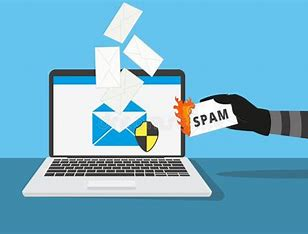

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv(r"D:\ICTAK\DSA\data\spam.csv", encoding='latin-1')

In [3]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
data.shape

(5572, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.isna().sum()

Category    0
Message     0
dtype: int64

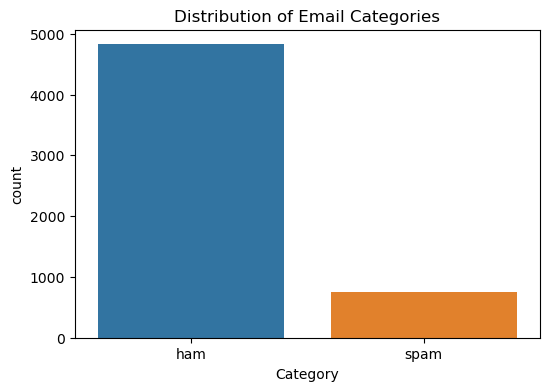

In [7]:
# Distribution of the 'Category' column (spam or ham)
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=data)
plt.title("Distribution of Email Categories")
plt.show()


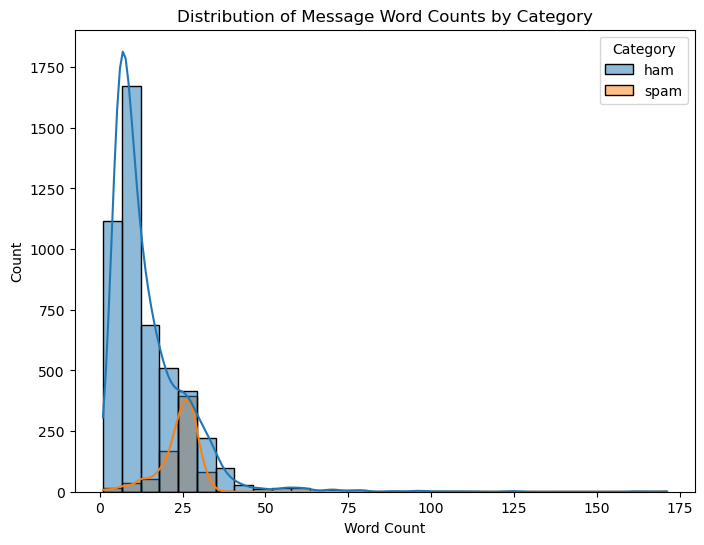

In [8]:
# Word count distribution for 'Message' column
data['Message_word_count'] = data['Message'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Message_word_count', hue='Category', bins=30, kde=True)
plt.title("Distribution of Message Word Counts by Category")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.show()

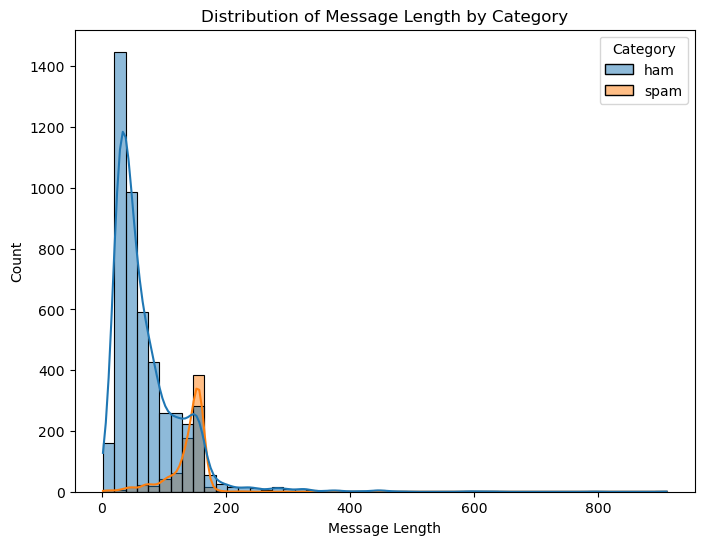

In [9]:
# Length of messages (character count) distribution
data['Message_length'] = data['Message'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Message_length', hue='Category', bins=50, kde=True)
plt.title("Distribution of Message Length by Category")
plt.xlabel("Message Length")
plt.ylabel("Count")
plt.show()

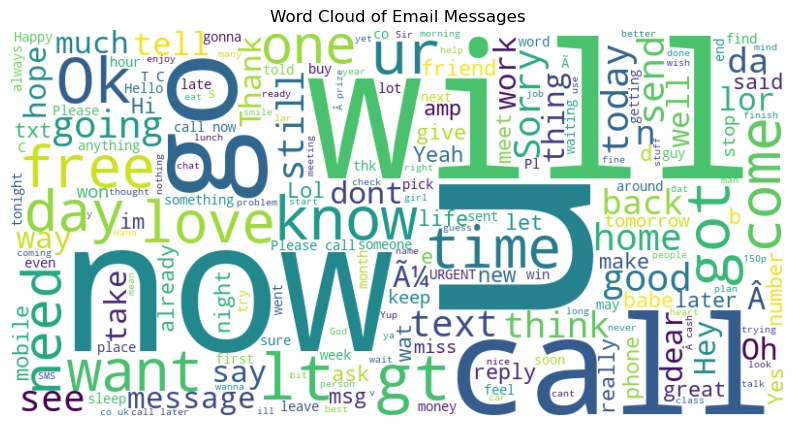

In [10]:
# Concatenate all email messages into a single text
all_text = ' '.join(data['Message'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Email Messages")
plt.show()

In [11]:




nltk.download('stopwords')
nltk.download('punkt')

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', 'URL', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Stemming (optional)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)
    
    return preprocessed_text

# Apply preprocessing to the 'Message' column
data['Message'] = data['Message'].apply(preprocess_text)

# Print the preprocessed data
print(data)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     Category                                            Message  \
0         ham  go jurong point , crazi .. avail bugi n great ...   
1         ham                      ok lar ... joke wif u oni ...   
2        spam  free entri 2 wkli comp win fa cup final tkt 21...   
3         ham        u dun say earli hor ... u c alreadi say ...   
4         ham         nah n't think goe usf , live around though   
...       ...                                                ...   
5567     spam  2nd time tri 2 contact u. u â£750 pound prize ...   
5568      ham                         ã¼ b go esplanad fr home ?   
5569      ham                      piti , * mood . ... suggest ?   
5570      ham  guy bitch act like 'd interest buy someth els ...   
5571      ham                                   rofl . true name   

      Message_word_count  Message_length  
0                     20             111  
1                      6              29  
2                     28             155  
3          

In [12]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed data
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Message'])

# Convert the TF-IDF matrix to a DataFrame for better understanding
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the TF-IDF features
print(tfidf_df)

       00  000  000pe  008704050406  0089  0121  01223585236  01223585334  \
0     0.0  0.0    0.0           0.0   0.0   0.0          0.0          0.0   
1     0.0  0.0    0.0           0.0   0.0   0.0          0.0          0.0   
2     0.0  0.0    0.0           0.0   0.0   0.0          0.0          0.0   
3     0.0  0.0    0.0           0.0   0.0   0.0          0.0          0.0   
4     0.0  0.0    0.0           0.0   0.0   0.0          0.0          0.0   
...   ...  ...    ...           ...   ...   ...          ...          ...   
5567  0.0  0.0    0.0           0.0   0.0   0.0          0.0          0.0   
5568  0.0  0.0    0.0           0.0   0.0   0.0          0.0          0.0   
5569  0.0  0.0    0.0           0.0   0.0   0.0          0.0          0.0   
5570  0.0  0.0    0.0           0.0   0.0   0.0          0.0          0.0   
5571  0.0  0.0    0.0           0.0   0.0   0.0          0.0          0.0   

      0125698789   02  ...  zero  zhong  zindgi  zoe  zogtoriu  zoom  zouk 

In [13]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'data' with 'Category' and 'Message' columns
X = data['Message']  # Features (email text)
y = data['Category']  # Target (spam or ham)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (3900,) (3900,)
Validation set shape: (836,) (836,)
Test set shape: (836,) (836,)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [15]:
# Transform the validation and test data
X_valid_tfidf = tfidf_vectorizer.transform(X_valid)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Make predictions on the validation and test sets
y_valid_pred = nb_classifier.predict(X_valid_tfidf)
y_test_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
print("Validation Set Performance:")
print(classification_report(y_valid, y_valid_pred))

print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


Validation Set Performance:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       724
        spam       1.00      0.76      0.86       112

    accuracy                           0.97       836
   macro avg       0.98      0.88      0.92       836
weighted avg       0.97      0.97      0.97       836

Test Set Performance:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       724
        spam       1.00      0.79      0.88       112

    accuracy                           0.97       836
   macro avg       0.98      0.89      0.93       836
weighted avg       0.97      0.97      0.97       836



In [16]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

input_data_features = tfidf_vectorizer.transform(input_mail)

prediction = nb_classifier.predict(input_data_features)
print(prediction)

if (prediction[0]=='ham'):
  print('Ham mail')
else:
  print('Spam mail')

['ham']
Ham mail


In [17]:
input_mail = ["free entri 2 wkli comp win fa cup final tkt 21"]

input_data_features = tfidf_vectorizer.transform(input_mail)

prediction = nb_classifier.predict(input_data_features)
print(prediction)

if (prediction[0]=='ham'):
  print('Ham mail')
else:
  print('Spam mail')

['spam']
Spam mail
